### Práctica 4 - Procesamiento de audio

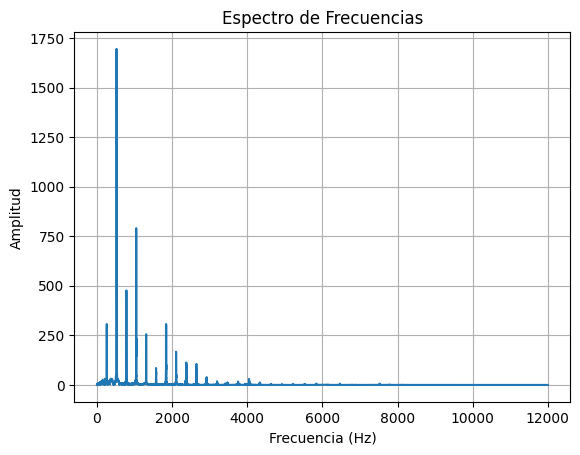

Frecuencia fundamental: 521.7261904761905 Hz


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter

#Leer el archivo de audio
sample_rate, data = wavfile.read('notas_piano/do.wav')

#Si el audio es estéreo, selecciona un solo canal
if len(data.shape) > 1:
    data = data[:,0]

#Número de muestras
N = len(data)
T=1.0/sample_rate

#Calcular la FFT
yf = fft(data)
xf = fftfreq(N,T)[:N//2]

#Visualizar el espectro de frecuencias
plt.plot(xf,2.0/N * np.abs(yf[0:N//2]))
plt.title('Espectro de Frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()
#Eje X (Frecuencia): Muestra las frecuencias presentes en la señal.
#Eje Y (Amplitud): Muestra la magnitud de cada frecuencia. 
#Picos altos indican las frecuencias dominantes en la señal.

#Esta línea de código imprime la frecuencia fundamental de la señal de audio, que es la frecuencia con la amplitud más alta en el espectro de frecuencias.
frecuencia_nota = xf[np.argmax(2.0/N * np.abs(yf[0:N//2]))]
print('Frecuencia fundamental:', frecuencia_nota, 'Hz')



In [2]:
notas_frecuencias = {
    'Do': {
        'Octava 0': 16.3516,
        'Octava 1': 32.7032,
        'Octava 2': 65.4064,
        'Octava 3': 130.813,
        'Octava 4': 261.626,
        'Octava 5': 523.251,
        'Octava 6': 1046.50,
        'Octava 7': 2093.00,
        'Octava 8': 4186.01
    },
    'Do# / Reb': {
        'Octava 0': 17.3239,
        'Octava 1': 34.6479,
        'Octava 2': 69.2957,
        'Octava 3': 138.591,
        'Octava 4': 277.183,
        'Octava 5': 554.365,
        'Octava 6': 1108.73,
        'Octava 7': 2217.46,
        'Octava 8': 4434.92
    },
    'Re': {
        'Octava 0': 18.3540,
        'Octava 1': 36.7081,
        'Octava 2': 73.4162,
        'Octava 3': 146.832,
        'Octava 4': 293.665,
        'Octava 5': 587.330,
        'Octava 6': 1174.66,
        'Octava 7': 2349.32,
        'Octava 8': 4698.64
    },
    'Re# / Mib': {
        'Octava 0': 19.4454,
        'Octava 1': 38.8909,
        'Octava 2': 77.7817,
        'Octava 3': 155.563,
        'Octava 4': 311.127,
        'Octava 5': 622.254,
        'Octava 6': 1244.51,
        'Octava 7': 2489.02,
        'Octava 8': 4978.04
    },
    'Mi': {
        'Octava 0': 20.6017,
        'Octava 1': 41.2035,
        'Octava 2': 82.4069,
        'Octava 3': 164.814,
        'Octava 4': 329.627,
        'Octava 5': 659.255,
        'Octava 6': 1318.51,
        'Octava 7': 2637.02,
        'Octava 8': 5274.04
    },
    'Fa': {
        'Octava 0': 21.8268,
        'Octava 1': 43.6536,
        'Octava 2': 87.3071,
        'Octava 3': 174.614,
        'Octava 4': 349.228,
        'Octava 5': 698.456,
        'Octava 6': 1396.91,
        'Octava 7': 2793.83,
        'Octava 8': 5587.65
    },
    'Fa# / Solb': {
        'Octava 0': 23.1246,
        'Octava 1': 46.2493,
        'Octava 2': 92.4986,
        'Octava 3': 184.997,
        'Octava 4': 369.994,
        'Octava 5': 739.989,
        'Octava 6': 1479.98,
        'Octava 7': 2959.96,
        'Octava 8': 5919.91
    },
    'Sol': {
        'Octava 0': 24.4997,
        'Octava 1': 48.9994,
        'Octava 2': 97.9989,
        'Octava 3': 195.998,
        'Octava 4': 391.995,
        'Octava 5': 783.991,
        'Octava 6': 1567.98,
        'Octava 7': 3135.96,
        'Octava 8': 6271.93
    },
    'Sol# / Lab': {
        'Octava 0': 25.9565,
        'Octava 1': 51.9131,
        'Octava 2': 103.826,
        'Octava 3': 207.652,
        'Octava 4': 415.305,
        'Octava 5': 830.609,
        'Octava 6': 1661.22,
        'Octava 7': 3322.44,
        'Octava 8': 6644.88
    },
    'La': {
        'Octava 0': 27.5000,
        'Octava 1': 55.0000,
        'Octava 2': 110.000,
        'Octava 3': 220.000,
        'Octava 4': 440.000,
        'Octava 5': 880.000,
        'Octava 6': 1760.00,
        'Octava 7': 3520.00,
        'Octava 8': 7040.00
    },
    'La# / Sib': {
        'Octava 0': 29.1352,
        'Octava 1': 58.2705,
        'Octava 2': 116.541,
        'Octava 3': 233.082,
        'Octava 4': 466.164,
        'Octava 5': 932.328,
        'Octava 6': 1864.66,
        'Octava 7': 3729.31,
        'Octava 8': 7458.62
    },
    'Si': {
        'Octava 0': 30.8677,
        'Octava 1': 61.7354,
        'Octava 2': 123.471,
        'Octava 3': 246.942,
        'Octava 4': 493.883,
        'Octava 5': 987.767,
        'Octava 6': 1975.53,
        'Octava 7': 3951.07,
        'Octava 8': 7902.13
    }
}

# Puedes acceder a las frecuencias de una nota en una octava específica, por ejemplo:
print(notas_frecuencias['Do']['Octava 4'])  # Debería imprimir 261.626


261.626


In [3]:
# Esta función recibe una frecuencia y retorna la nota musical correspondiente.
def identificador_nota(frecuencia):
    tolerancia = 0.05  # 5% de tolerancia sobre la frecuencia

    for nota, octavas in notas_frecuencias.items():
        for octava, f_hz in octavas.items():
            if (1 - tolerancia) * f_hz < frecuencia < (1 + tolerancia) * f_hz:
                print(f"Nota identificada: {nota} en {octava} ({f_hz} Hz)")
                return nota, octava
    #print(f"Frecuencia {frecuencia} no coincide con ninguna nota.")
    return None

# Función para aplicar filtro pasa banda
def filtro_pasa_banda(datos, fs, lowcut=10, highcut=8000, orden=5):
    # Crear el filtro Butterworth
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(orden, [low, high], btype='band')
    datos_filtrados = lfilter(b, a, datos)
    return datos_filtrados

def get_frecuencia_sonido(ruta_archivo):
    
    #Leer el archivo de audio
    sample_rate, data = wavfile.read(ruta_archivo)

    #Si el audio es estéreo, selecciona un solo canal
    if len(data.shape) > 1:
        data = data[:,0]

    #Número de muestras
    N = len(data)
    T=1.0/sample_rate

    #Calcular la FFT
    yf = fft(data)
    xf = fftfreq(N,T)[:N//2]

    #Esta línea de código imprime la frecuencia fundamental de la señal de audio, que es la frecuencia con la amplitud más alta en el espectro de frecuencias.
    frecuencia_dominante = xf[np.argmax(2.0/N * np.abs(yf[0:N//2]))]
    
    identificador_nota(frecuencia_dominante)
    
    print('Frecuencia fundamental:', frecuencia_dominante, 'Hz')

get_frecuencia_sonido("notas_piano/do.wav") 


Nota identificada: Do en Octava 5 (523.251 Hz)
Frecuencia fundamental: 521.7261904761905 Hz


In [5]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter, find_peaks


# Esta función recibe una frecuencia y retorna la nota musical correspondiente
def identificador_nota(frecuencia):
    tolerancia = 0.05  # 5% de tolerancia sobre la frecuencia

    for nota, octavas in notas_frecuencias.items():
        for octava, f_hz in octavas.items():
            if (1 - tolerancia) * f_hz < frecuencia < (1 + tolerancia) * f_hz:
                print(f"Nota identificada: {nota} en {octava} ({f_hz} Hz)")
                return nota, octava
    return None

# Parámetros de la grabación
formato = pyaudio.paInt16  # Formato de la muestra (16-bit)
canales = 1  # 1 para mono
tasa_muestreo = 44100  # Frecuencia de muestreo en Hz
tamano_buffer = 4096  # Tamaño del buffer (cantidad de muestras por captura)

# Inicializar PyAudio
p = pyaudio.PyAudio()

# Función para capturar y procesar audio en tiempo real
def capturar_y_procesar_audio(duracion=25):
    stream = p.open(format=formato,
                    channels=canales,
                    rate=tasa_muestreo,
                    input=True,
                    frames_per_buffer=tamano_buffer)

    print("Grabando...")

    for _ in range(0, int(tasa_muestreo / tamano_buffer * duracion)):
        # Leer los datos crudos del audio
        datos = stream.read(tamano_buffer)
        
        # Convertir los datos crudos a un arreglo de numpy
        datos_np = np.frombuffer(datos, dtype=np.int16)
        
        # Filtrar los datos (puedes añadir filtro pasa banda si es necesario)
        datos_filtrados = filtro_pasa_banda(datos_np, tasa_muestreo)
        
        # Procesar los datos (calcular la FFT)
        N = len(datos_filtrados)
        yf = fft(datos_filtrados)
        xf = fftfreq(N, 1/tasa_muestreo)
        yf_abs = 2.0/N * np.abs(yf[:N//2])  # Tomar solo la parte positiva
        
        # Umbral de amplitud para filtrar el ruido de fondo
        umbral_amplitud = 1000
        
        # Usar find_peaks para encontrar los picos significativos
        picos, _ = find_peaks(yf_abs, height=umbral_amplitud, distance=20)  # Ajusta la distancia según el contexto
        
        # Iterar sobre los picos detectados
        for pico in picos:
            frecuencia_sonido = xf[pico]
            identificador_nota(frecuencia_sonido)

    print("Grabación finalizada")
    stream.stop_stream()
    stream.close()

# Ejecutar la captura y procesamiento de audio en tiempo real durante 25 segundos
capturar_y_procesar_audio(25)

# Cerrar PyAudio
p.terminate()


Grabando...
Nota identificada: Do en Octava 5 (523.251 Hz)
Nota identificada: Do en Octava 5 (523.251 Hz)
Nota identificada: Re en Octava 5 (587.33 Hz)
Nota identificada: Re en Octava 6 (1174.66 Hz)
Nota identificada: Re# / Mib en Octava 4 (311.127 Hz)
Nota identificada: Mi en Octava 5 (659.255 Hz)
Nota identificada: Re# / Mib en Octava 4 (311.127 Hz)
Nota identificada: Mi en Octava 5 (659.255 Hz)
Nota identificada: Re# / Mib en Octava 4 (311.127 Hz)
Nota identificada: Do# / Reb en Octava 5 (554.365 Hz)
Nota identificada: Re# / Mib en Octava 4 (311.127 Hz)
Nota identificada: Do# / Reb en Octava 5 (554.365 Hz)
Nota identificada: La# / Sib en Octava 5 (932.328 Hz)
Nota identificada: Re# / Mib en Octava 4 (311.127 Hz)
Nota identificada: Do# / Reb en Octava 5 (554.365 Hz)
Nota identificada: Re# / Mib en Octava 4 (311.127 Hz)
Nota identificada: Re en Octava 5 (587.33 Hz)
Nota identificada: Sol# / Lab en Octava 6 (1661.22 Hz)
Nota identificada: Do# / Reb en Octava 5 (554.365 Hz)
Nota identif

KeyboardInterrupt: 